# Loan Approval Data Analysis

This notebook performs exploratory data analysis and preprocessing on loan analysis data to prepare it for machine learning classification.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print("Successfully installed")

## Load and Explore the Dataset

Load the loan approcal dataset and perform initial exploration to understand its structure, data types, and identify missing values.

In [2]:
df = pd.read_csv("loan_approval_dataset.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


## Data Cleaning - Remove Unnecessary Columns

The first column appears to be an id column, this does not provide any significance. We will remove it to simplify our analysis


In [3]:
df.drop(columns=["loan_id"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


## Data Cleaning - Check for null values or duplicates

The data seems to be already clean, but it doesnt hurt to check for it twice.


In [4]:
print(df.isna().sum())
print("=" * 60)
print("\n Total duplicates")
print(df.duplicated().sum())

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

 Total duplicates
0


## Data Cleaning - stripping extra space from col_name
it seems the columns has extra white space, this may cause unnecesarry confusion. So it is better to strip.

In [5]:
df.columns = df.columns.str.strip()
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = df[col].str.strip()

## Data Cleaning - Check for outliers and skewness

Since the data is clean already let us check for the skewness and outliers of numerical cols. Then check the balance of categorical columns

In [6]:
# check for each numerical skewness
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

print("Skewness Analysis:")
print("=" * 60)
for col in numerical_cols:
    skewness = df[col].skew()
    
    # Interpret skewness
    if abs(skewness) < 0.5:
        interpretation = "Fairly symmetric"
    elif abs(skewness) < 1:
        interpretation = "Moderately skewed"
    else:
        interpretation = "Highly skewed"
    
    direction = "right" if skewness > 0 else "left" if skewness < 0 else "symmetric"
    
    print(f"{col:20s}: {skewness:7.2f} - {interpretation} ({direction})")

Skewness Analysis:
no_of_dependents    :   -0.02 - Fairly symmetric (left)
income_annum        :   -0.01 - Fairly symmetric (left)
loan_amount         :    0.31 - Fairly symmetric (right)
loan_term           :    0.04 - Fairly symmetric (right)
cibil_score         :   -0.01 - Fairly symmetric (left)
residential_assets_value:    0.98 - Moderately skewed (right)
commercial_assets_value:    0.96 - Moderately skewed (right)
luxury_assets_value :    0.32 - Fairly symmetric (right)
bank_asset_value    :    0.56 - Moderately skewed (right)


In [7]:
# check for outliers using IQR method
for col in numerical_cols:
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IQR = Q3 - Q1

    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    print(f"{col}: {outlier_count} outliers ({outlier_count/len(df)*100:.2f}%)")

no_of_dependents: 0 outliers (0.00%)
income_annum: 0 outliers (0.00%)
loan_amount: 0 outliers (0.00%)
loan_term: 0 outliers (0.00%)
cibil_score: 0 outliers (0.00%)
residential_assets_value: 52 outliers (1.23%)
commercial_assets_value: 35 outliers (0.84%)
luxury_assets_value: 0 outliers (0.00%)
bank_asset_value: 9 outliers (0.22%)


In [8]:
for col in categorical_cols:
    print(f"\n{'='*60}")
    print(f"Column: {col}")
    print(f"{'='*60}")
    print(df[col].value_counts())
    print(f"\nPercentage distribution:")
    print(df[col].value_counts(normalize=True).mul(100).round(2))


Column: education
education
Graduate        2106
Not Graduate    2067
Name: count, dtype: int64

Percentage distribution:
education
Graduate        50.47
Not Graduate    49.53
Name: proportion, dtype: float64

Column: self_employed
self_employed
Yes    2102
No     2071
Name: count, dtype: int64

Percentage distribution:
self_employed
Yes    50.37
No     49.63
Name: proportion, dtype: float64

Column: loan_status
loan_status
Approved    2599
Rejected    1574
Name: count, dtype: int64

Percentage distribution:
loan_status
Approved    62.28
Rejected    37.72
Name: proportion, dtype: float64


## Data Visualization - Visualize data and trends

To better grasp patterns or correlation, it is better to visualize the data and its agreggrations. 

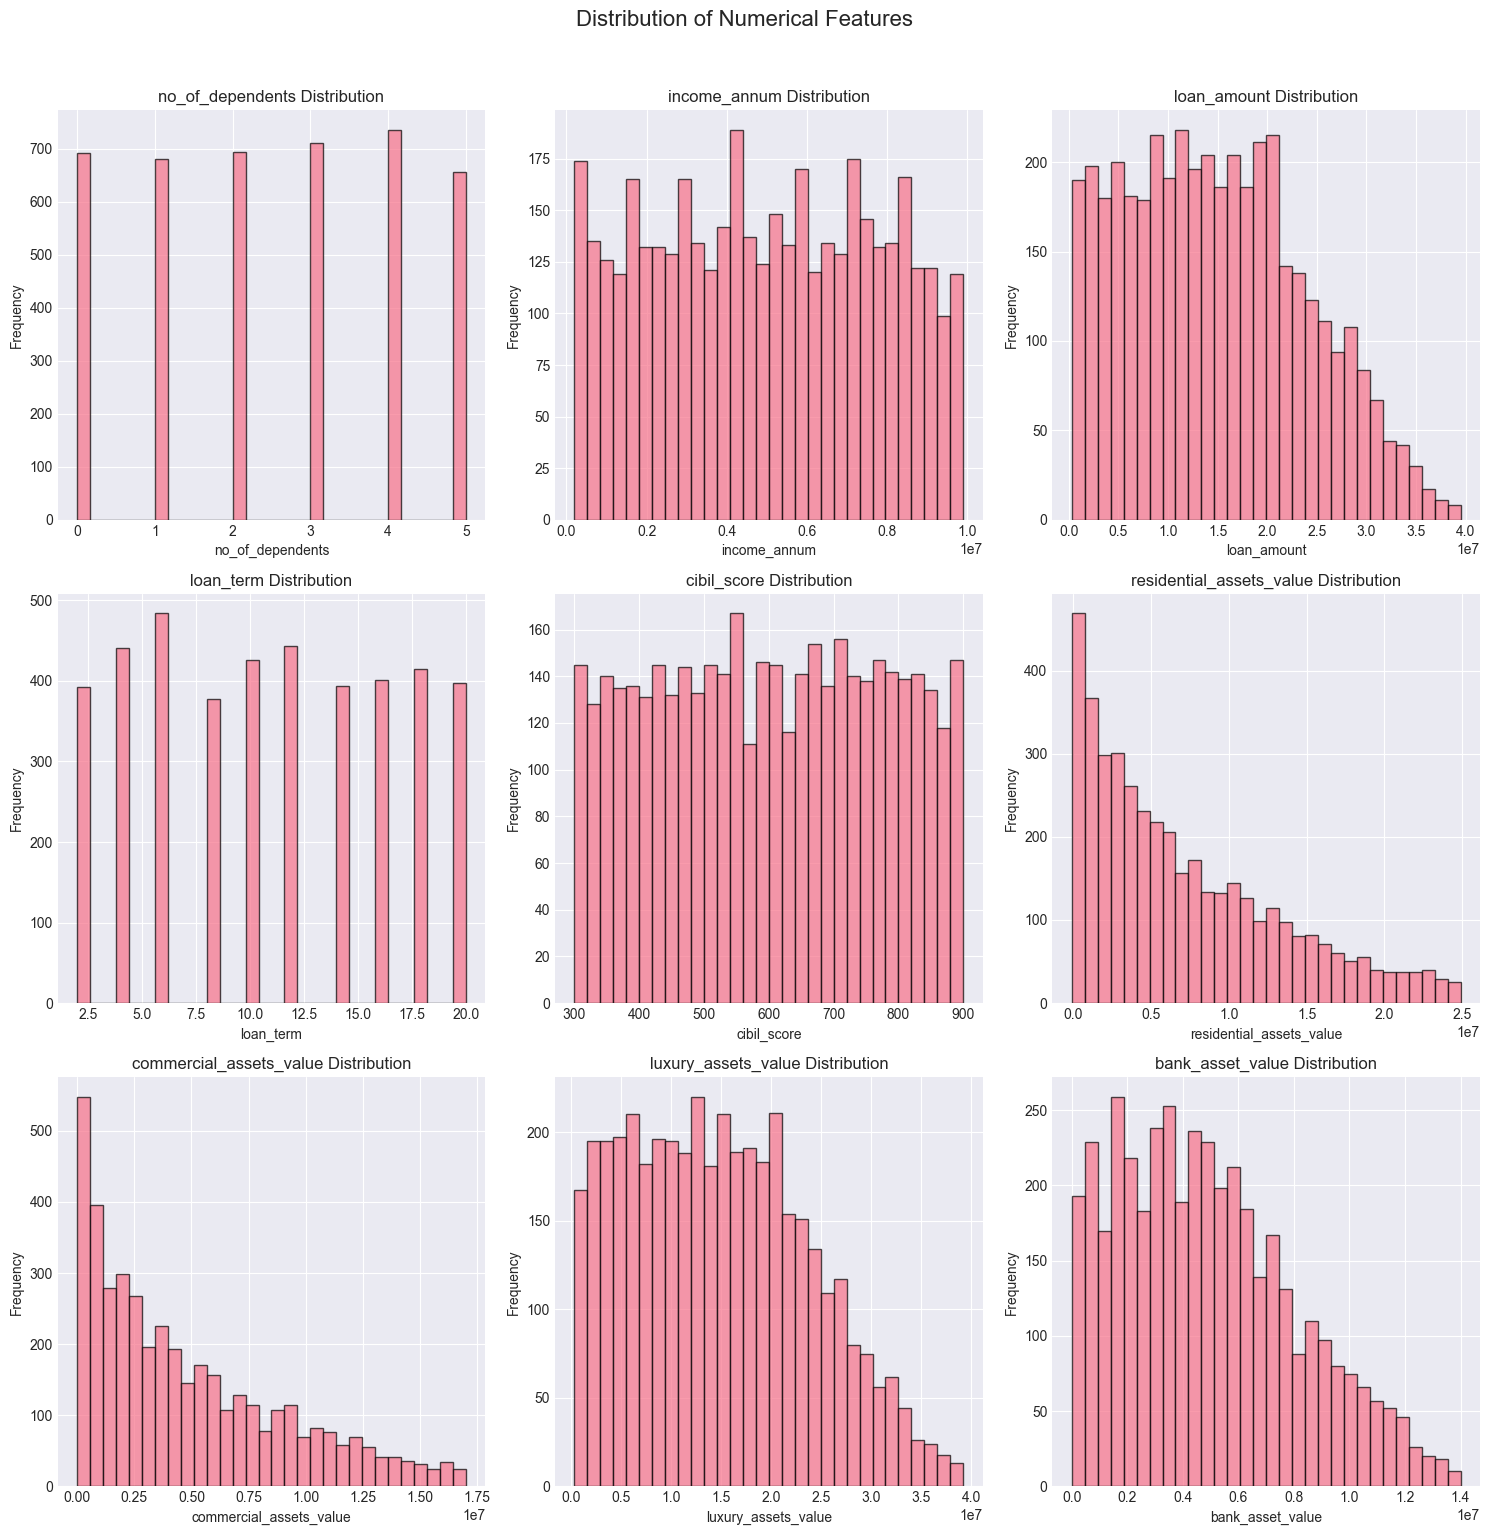

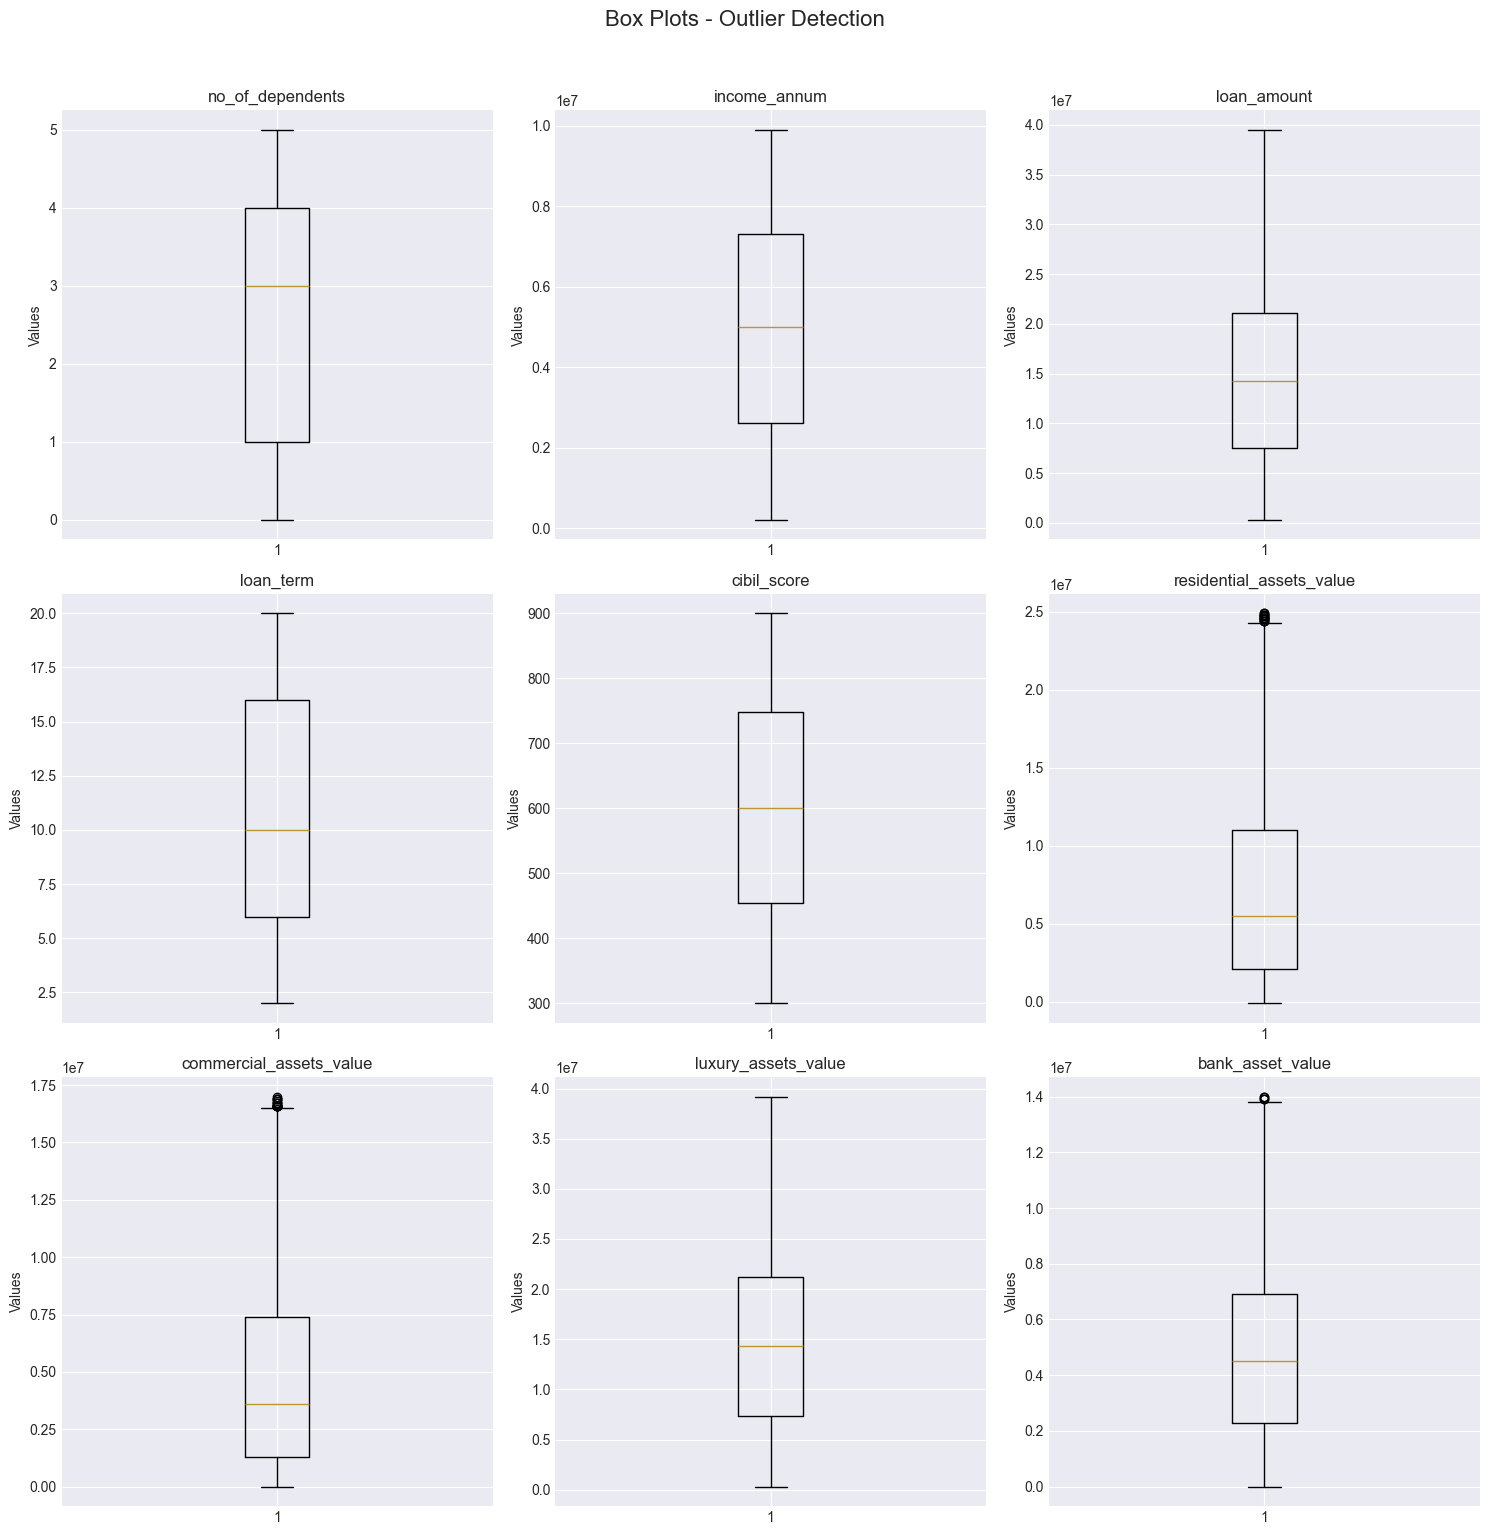

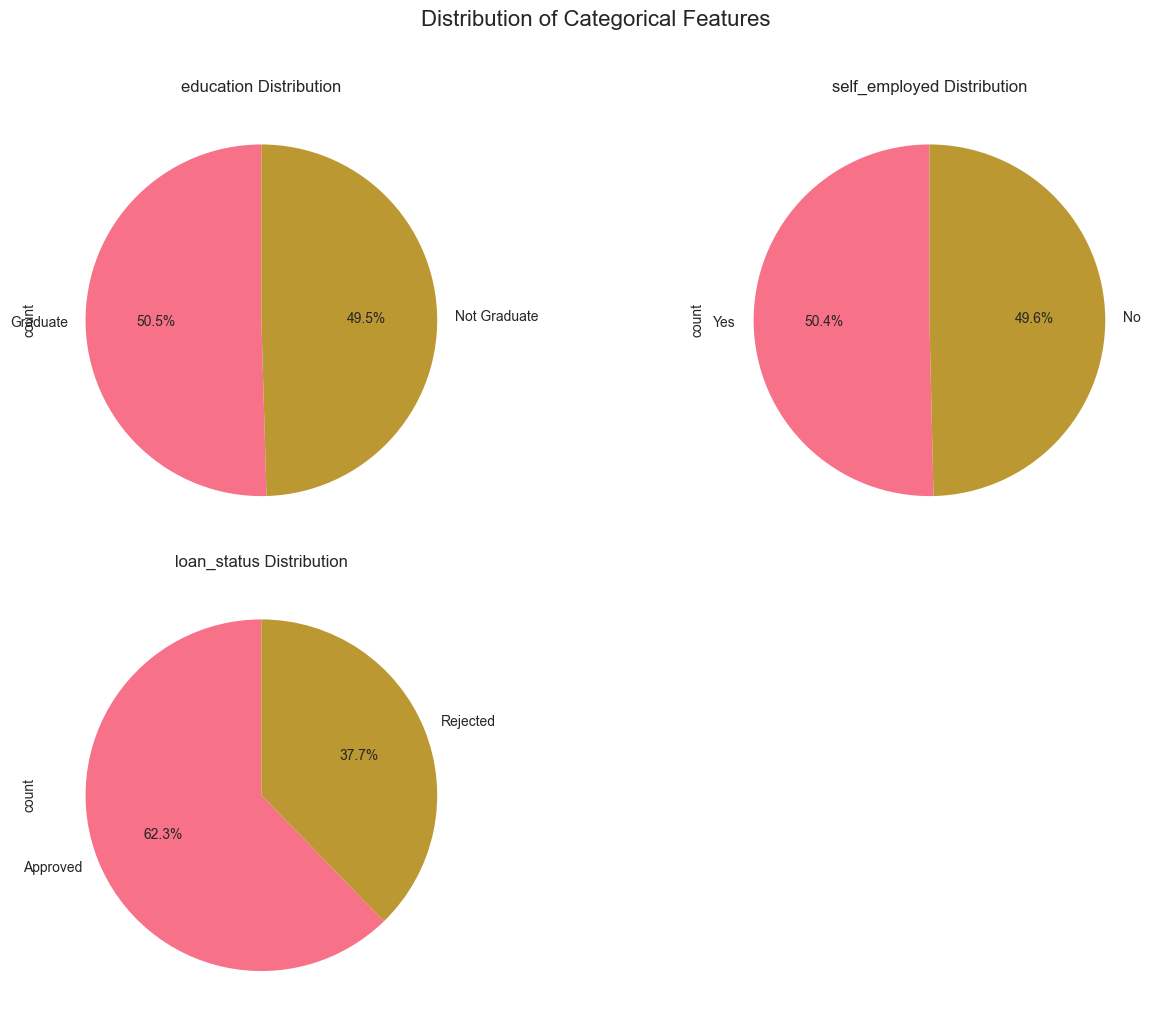

In [9]:
# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# 1. Distribution of numerical features
num_cols_count = len(numerical_cols)
n_rows = (num_cols_count + 2) // 3  # Calculate rows needed
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5*n_rows))
fig.suptitle('Distribution of Numerical Features', fontsize=16, y=1.02)

# Flatten axes array for easier iteration
axes = axes.flatten() if num_cols_count > 3 else [axes] if num_cols_count == 1 else axes

for idx, col in enumerate(numerical_cols):
    axes[idx].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{col} Distribution')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

# Hide extra subplots if any
for idx in range(num_cols_count, len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

# 2. Box plots to visualize outliers
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5*n_rows))
fig.suptitle('Box Plots - Outlier Detection', fontsize=16, y=1.02)

axes = axes.flatten() if num_cols_count > 3 else [axes] if num_cols_count == 1 else axes

for idx, col in enumerate(numerical_cols):
    axes[idx].boxplot(df[col])
    axes[idx].set_title(f'{col}')
    axes[idx].set_ylabel('Values')

# Hide extra subplots if any
for idx in range(num_cols_count, len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

# 3. Categorical features distribution
cat_cols_count = len(categorical_cols)
cat_rows = (cat_cols_count + 1) // 2  # Calculate rows needed
fig, axes = plt.subplots(cat_rows, 2, figsize=(14, 5*cat_rows))
fig.suptitle('Distribution of Categorical Features', fontsize=16, y=1.02)

axes = axes.flatten() if cat_cols_count > 2 else [axes] if cat_cols_count == 1 else axes

for idx, col in enumerate(categorical_cols):
    df[col].value_counts().plot(kind='pie', ax=axes[idx], autopct='%1.1f%%', startangle=90)
    axes[idx].set_title(f'{col} Distribution')


    # Add value labels on top of bars
    for container in axes[idx].containers:
        axes[idx].bar_label(container, fmt='%d', padding=3, fontsize=8)

# Hide extra subplots if any
for idx in range(cat_cols_count, len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

## Data Visualization - aggregations
We should check the data for certain group trends

Correlation Analysis:
                          no_of_dependents  income_annum  loan_amount  \
no_of_dependents                  1.000000      0.008328    -0.005251   
income_annum                      0.008328      1.000000     0.927962   
loan_amount                      -0.005251      0.927962     1.000000   
loan_term                        -0.020783      0.006938     0.004848   
cibil_score                      -0.010017     -0.020922    -0.015739   
residential_assets_value          0.012032      0.627126     0.591447   
commercial_assets_value          -0.002042      0.635076     0.597812   
luxury_assets_value               0.003861      0.929990     0.863382   
bank_asset_value                  0.010527      0.850779     0.789859   

                          loan_term  cibil_score  residential_assets_value  \
no_of_dependents          -0.020783    -0.010017                  0.012032   
income_annum               0.006938    -0.020922                  0.627126   
loan_amount  

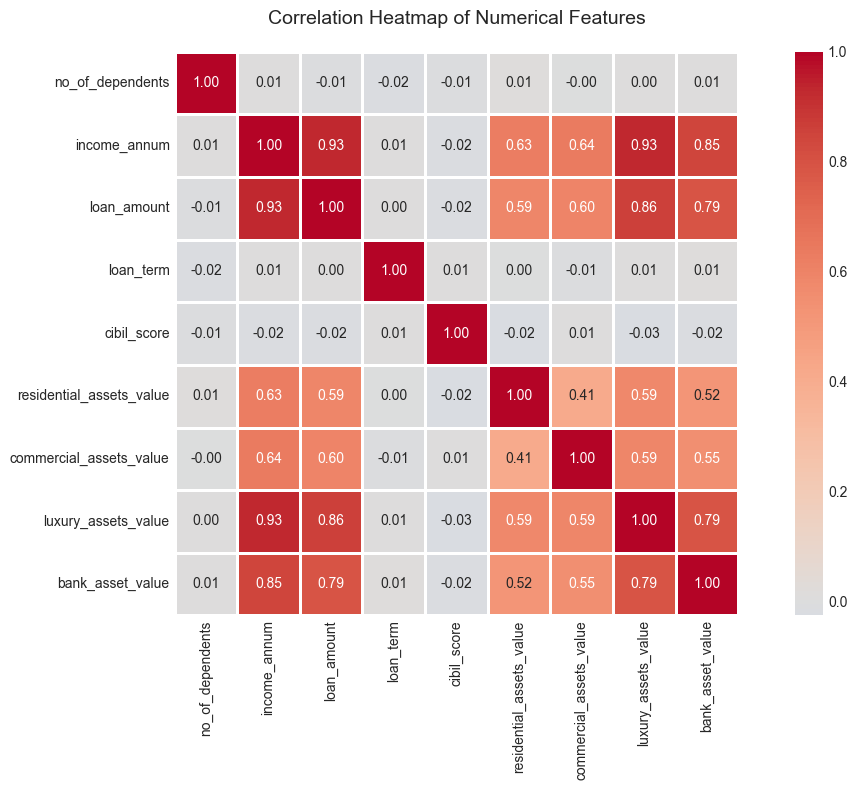


Statistics by Loan Status:
             no_of_dependents  income_annum   loan_amount  loan_term  \
loan_status                                                            
Approved             2.475568  4.929935e+06  1.498095e+07  10.373990   
Rejected             2.540025  5.006163e+06  1.465591e+07  11.724269   

             cibil_score  residential_assets_value  commercial_assets_value  \
loan_status                                                                   
Approved      703.537899              7.106002e+06             4.869988e+06   
Rejected      429.559720              7.308450e+06             4.732338e+06   

             luxury_assets_value  bank_asset_value  
loan_status                                         
Approved            1.476402e+07      4.843363e+06  
Rejected            1.499574e+07      4.896950e+06  


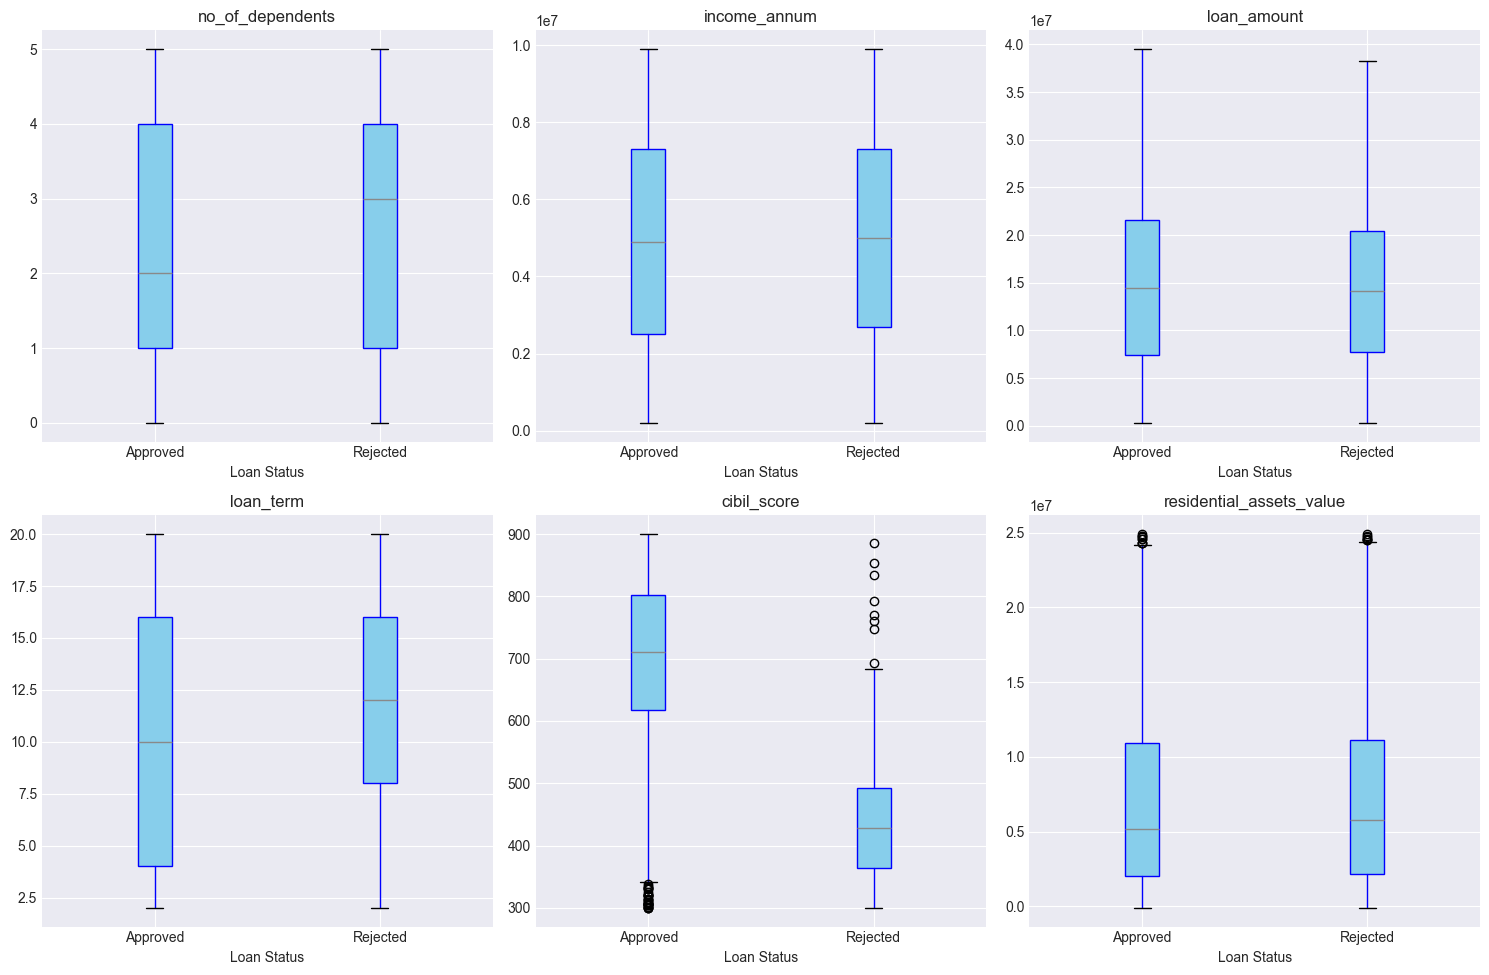


Cross-tabulation: education vs self_employed
self_employed     No    Yes
education                  
Graduate       50.66  49.34
Not Graduate   48.57  51.43


<Figure size 1000x600 with 0 Axes>

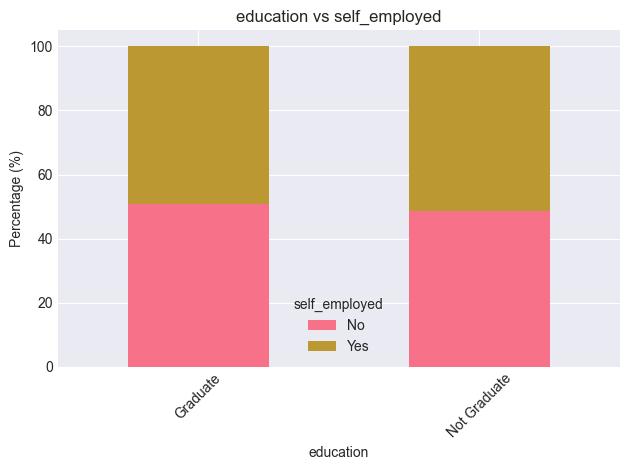


Summary Statistics:
       no_of_dependents  income_annum   loan_amount    loan_term  cibil_score  \
count       4173.000000  4.173000e+03  4.173000e+03  4173.000000  4173.000000   
mean           2.499880  4.958687e+06  1.485835e+07    10.883297   600.196981   
std            1.694504  2.758154e+06  8.922852e+06     5.707394   172.346701   
min            0.000000  2.000000e+05  3.000000e+05     2.000000   300.000000   
25%            1.000000  2.600000e+06  7.500000e+06     6.000000   454.000000   
50%            3.000000  5.000000e+06  1.430000e+07    10.000000   600.000000   
75%            4.000000  7.300000e+06  2.110000e+07    16.000000   748.000000   
max            5.000000  9.900000e+06  3.950000e+07    20.000000   900.000000   

       residential_assets_value  commercial_assets_value  luxury_assets_value  \
count              4.173000e+03             4.173000e+03         4.173000e+03   
mean               7.182363e+06             4.818069e+06         1.485143e+07   
std   

In [10]:
# Correlation matrix for numerical features
print("Correlation Analysis:")
print("=" * 60)
correlation_matrix = df[numerical_cols].corr()
print(correlation_matrix)

# Visualize correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=1, center=0)
plt.title('Correlation Heatmap of Numerical Features', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

# Group statistics by categorical variables (if loan_status exists)
if 'loan_status' in df.columns:
    print("\n" + "=" * 60)
    print("Statistics by Loan Status:")
    print("=" * 60)
    print(df.groupby('loan_status')[numerical_cols].mean())
    
    # Visualize numerical features by loan status
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle('Numerical Features by Loan Status', fontsize=16, y=1.02)
    axes = axes.flatten()
    
    for idx, col in enumerate(numerical_cols[:6]):
        df.boxplot(column=col, by='loan_status', ax=axes[idx],whiskerprops=dict(color='blue'),  boxprops=dict(facecolor='skyblue', color='blue'),  patch_artist=True)
        axes[idx].set_title(f'{col}')
        axes[idx].set_xlabel('Loan Status')
        plt.suptitle('')  # Remove default title
    
    plt.tight_layout()
    plt.show()

# Cross-tabulation of categorical variables
if len(categorical_cols) >= 2:
    print("\n" + "=" * 60)
    print(f"Cross-tabulation: {categorical_cols[0]} vs {categorical_cols[1]}")
    print("=" * 60)
    crosstab = pd.crosstab(df[categorical_cols[0]], df[categorical_cols[1]], 
    normalize='index') * 100
    print(crosstab.round(2))
    
    # Visualize cross-tabulation
    plt.figure(figsize=(10, 6))
    crosstab.plot(kind='bar', stacked=True)
    plt.title(f'{categorical_cols[0]} vs {categorical_cols[1]}')
    plt.xlabel(categorical_cols[0])
    plt.ylabel('Percentage (%)')
    plt.legend(title=categorical_cols[1])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Summary statistics by groups
print("\n" + "=" * 60)
print("Summary Statistics:")
print("=" * 60)
print(df[numerical_cols].describe())

## Feature Engineering - Human Insights

Let us find features to get some analysis


In [11]:
# person's total assest
df["total_assets"] =  df["residential_assets_value"] + df["commercial_assets_value"] + df["luxury_assets_value"] + df["bank_asset_value"]

# family burden
df['income_per_dependent'] = df['income_annum'] / (df['no_of_dependents'] + 1)
df['loan_per_dependent'] = df['loan_amount'] / (df['no_of_dependents'] + 1)

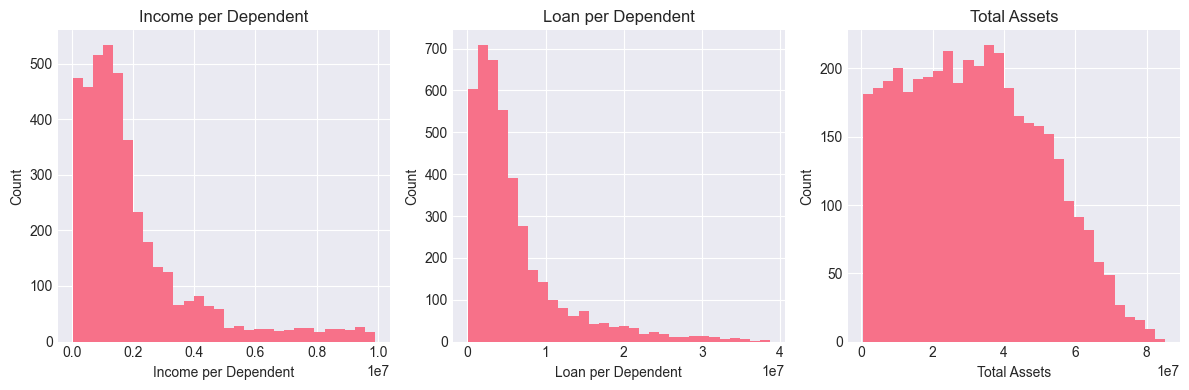

<class 'pandas.core.frame.DataFrame'>
Index: 4173 entries, 1 to 4268
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   no_of_dependents          4173 non-null   int64  
 1   education                 4173 non-null   object 
 2   self_employed             4173 non-null   object 
 3   income_annum              4173 non-null   int64  
 4   loan_amount               4173 non-null   int64  
 5   loan_term                 4173 non-null   int64  
 6   cibil_score               4173 non-null   int64  
 7   residential_assets_value  4173 non-null   int64  
 8   commercial_assets_value   4173 non-null   int64  
 9   luxury_assets_value       4173 non-null   int64  
 10  bank_asset_value          4173 non-null   int64  
 11  loan_status               4173 non-null   object 
 12  total_assets              4173 non-null   int64  
 13  income_per_dependent      4173 non-null   float64
 14  loan_per_depe

In [12]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(df['income_per_dependent'], bins=30)
plt.title('Income per Dependent')
plt.xlabel('Income per Dependent')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(df['loan_per_dependent'], bins=30)
plt.title('Loan per Dependent')
plt.xlabel('Loan per Dependent')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(df['total_assets'], bins=30)
plt.title('Total Assets')
plt.xlabel('Total Assets')
plt.ylabel('Count')

plt.tight_layout()
plt.show()
df.info()


## Preprocessing - Categorical Encoding
We will be converting categorical values into 1 and 0. This will let the model better understand them.

In [13]:
df['education'] = (df['education'] == 'Graduate').astype(int)
df['self_employed'] = (df['self_employed'] == 'Yes').astype(int)
df['loan_status'] = (df['loan_status'] == 'Approved').astype(int)



## Preprocessing - vairable selection
We will be identifying our features and target feature

In [14]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

## Preprocessing - Train and test split

This is where we split our data. Then scaling the features to reduce the gaps

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Model Training and Evaluation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_auc_score
)
import time

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}

# Store results
results = []

print("="*80)
print("MODEL TRAINING AND EVALUATION")
print("="*80)

# Train and evaluate each model
for name, model in models.items():
    print(f"\n{'='*80}")
    print(f"Training: {name}")
    print(f"{'='*80}")
    
    # Train the model
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    training_time = time.time() - start_time
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Calculate metrics (with zero_division handling for imbalanced datasets)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    
    # Store results
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'Training Time (s)': training_time
    })
    
    # Print results
    print(f"\nTraining Time: {training_time:.4f} seconds")
    print("\nPerformance Metrics:")
    print(f"  Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-Score:  {f1:.4f}")
    if roc_auc:
        print(f"  ROC-AUC:   {roc_auc:.4f}")
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Failure', 'Success'], zero_division=0))
    
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print(f"  True Negatives:  {cm[0][0]}")
    print(f"  False Positives: {cm[0][1]}")
    print(f"  False Negatives: {cm[1][0]}")
    print(f"  True Positives:  {cm[1][1]}")

print("\n" + "="*80)
print("✓ All models trained successfully!")
print("="*80)

MODEL TRAINING AND EVALUATION

Training: Logistic Regression

Training Time: 0.0162 seconds

Performance Metrics:
  Accuracy:  0.9090 (90.90%)
  Precision: 0.9253
  Recall:    0.9288
  F1-Score:  0.9271
  ROC-AUC:   0.9697

Classification Report:
              precision    recall  f1-score   support

     Failure       0.88      0.88      0.88       315
     Success       0.93      0.93      0.93       520

    accuracy                           0.91       835
   macro avg       0.90      0.90      0.90       835
weighted avg       0.91      0.91      0.91       835


Confusion Matrix:
[[276  39]
 [ 37 483]]
  True Negatives:  276
  False Positives: 39
  False Negatives: 37
  True Positives:  483

Training: Random Forest

Training Time: 0.2387 seconds

Performance Metrics:
  Accuracy:  0.9737 (97.37%)
  Precision: 0.9788
  Recall:    0.9788
  F1-Score:  0.9788
  ROC-AUC:   0.9955

Classification Report:
              precision    recall  f1-score   support

     Failure       0.97     